<a href="https://colab.research.google.com/github/MalayathiGeetha/Deep_Learning_Practice_Notes/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


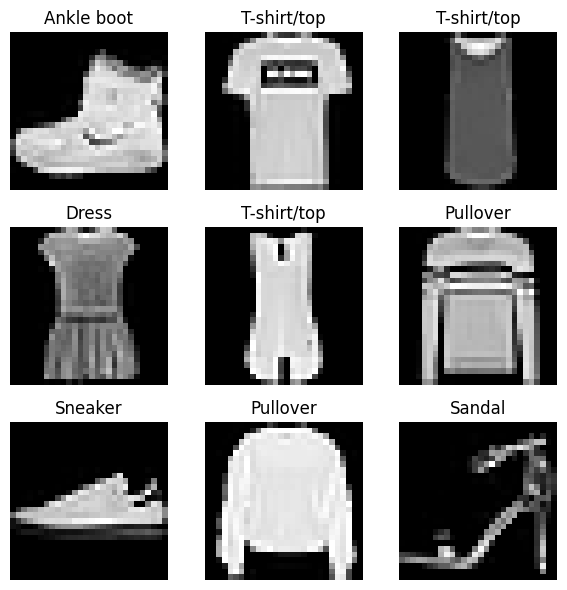

In [4]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7796 - loss: 0.6307 - val_accuracy: 0.8592 - val_loss: 0.3923
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8623 - loss: 0.3806 - val_accuracy: 0.8613 - val_loss: 0.3812
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8756 - loss: 0.3394 - val_accuracy: 0.8762 - val_loss: 0.3443
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8888 - loss: 0.3056 - val_accuracy: 0.8807 - val_loss: 0.3271
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8911 - loss: 0.2981 - val_accuracy: 0.8633 - val_loss: 0.3572
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8978 - loss: 0.2803 - val_accuracy: 0.8847 - val_loss: 0.3233
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8995 - loss: 0.2691 - val_accuracy: 0.8783 - val_loss: 0.3346
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9058 - loss: 0.2558 

In [9]:
import numpy as np
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print("\nPredicted:", class_names[predicted_label])
print("Actual:", class_names[y_test[0]])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predicted: Ankle boot
Actual: Ankle boot


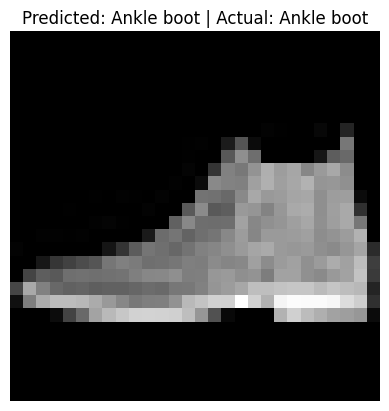

In [10]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label]} | Actual: {class_names[y_test[0]]}")
plt.axis('off')
plt.show()
